In [1]:
import yaml

file_path = '/home/jseia/Desktop/thesis/code/nnUNet_ais/DeSD/cfg_files/ssl_pretrain/all_ncct/config_all_ncct_002.yml'
with open(file_path, 'r') as yfile:
    cfg = yaml.safe_load(yfile)

In [2]:
import torch
import os
from pathlib import Path
repo_root = Path().resolve().parent
import sys ; sys.path.insert(0, str(repo_root))

base_path = Path('/home/jseia/Desktop/thesis/code/nnUNet_ais/nnunetv2')
os.environ['nnUNet_raw'] = str(base_path/'nnUNet_raw')
os.environ['nnUNet_preprocessed'] = str(base_path/'preprocessed')
os.environ['nnUNet_results'] = str(base_path/'nnUNet_trained_models')

from DeSD.data_loader_ssl import Dataset3D

train_set = Dataset3D(cfg['training']['dataset'], train=True, cfg = cfg['training'])


tr cfg:
 {'global_scale': [0.8, 1.2], 'local_scale': [1.5, 2.0], 'mirror': True, 'symmetry': None, 'i_global': {'g_noise': [1.0, 1.0], 'g_blur': [0.8, 0.8], 'mult_bright': [0.8, 1.0], 'brightness': [0.8, 0.8], 'contrast_augm': [1.0, 1.0], 'gamma': [0.8, 1.0], 'per_channel': False}, 'i_local': {'g_noise': [1.0, 1.0], 'g_blur': [0.8, 0.5], 'mult_bright': [1.0, 1.0], 'brightness': [0.8, 0.5], 'contrast_augm': [1.0, 1.0], 'gamma': [1.0, 1.0], 'per_channel': True}}

symmetry
 False
SSL: 9600 images are loaded!


In [3]:
# import matplotlib.pyplot as plt
# sample = train_set[0]
# plt.subplot(1,2,1)
# plt.imshow(sample[0][0, 1, :, :], cmap='gray')#, vmin=-3, vmax=3)
# plt.subplot(1,2,2)
# plt.imshow(sample[0][0, 2, :, :], cmap='gray')#, vmin=-3, vmax=3)
# plt.figure()
# plt.subplot(1,2,1)
# plt.imshow(sample[1][0, 1, :, :], cmap='gray')#, vmin=-3, vmax=3)
# plt.subplot(1,2,2)
# plt.imshow(sample[1][0, 2, :, :], cmap='gray')#, vmin=-3, vmax=3)

# # import SimpleITK as sitk
# # img = sitk.GetImageFromArray(sample[0][0])
# # sitk.WriteImage(img,'/home/jseia/Desktop/thesis/code/nnUNet_ais/img1.nii.gz' )
# # img = sitk.GetImageFromArray(sample[1][0])
# # sitk.WriteImage(img,'/home/jseia/Desktop/thesis/code/nnUNet_ais/img2.nii.gz' )

In [4]:
train_data_loader = torch.utils.data.DataLoader(train_set,
                                                batch_size=3,
                                                num_workers=1,
                                                pin_memory=False,
                                                drop_last=False,
                                                shuffle=True)

In [5]:
# (2, 3, 1, 16, 112, 112)

[(3, 2, 16, 112, 112), (3, 2, 16, 112, 112)]


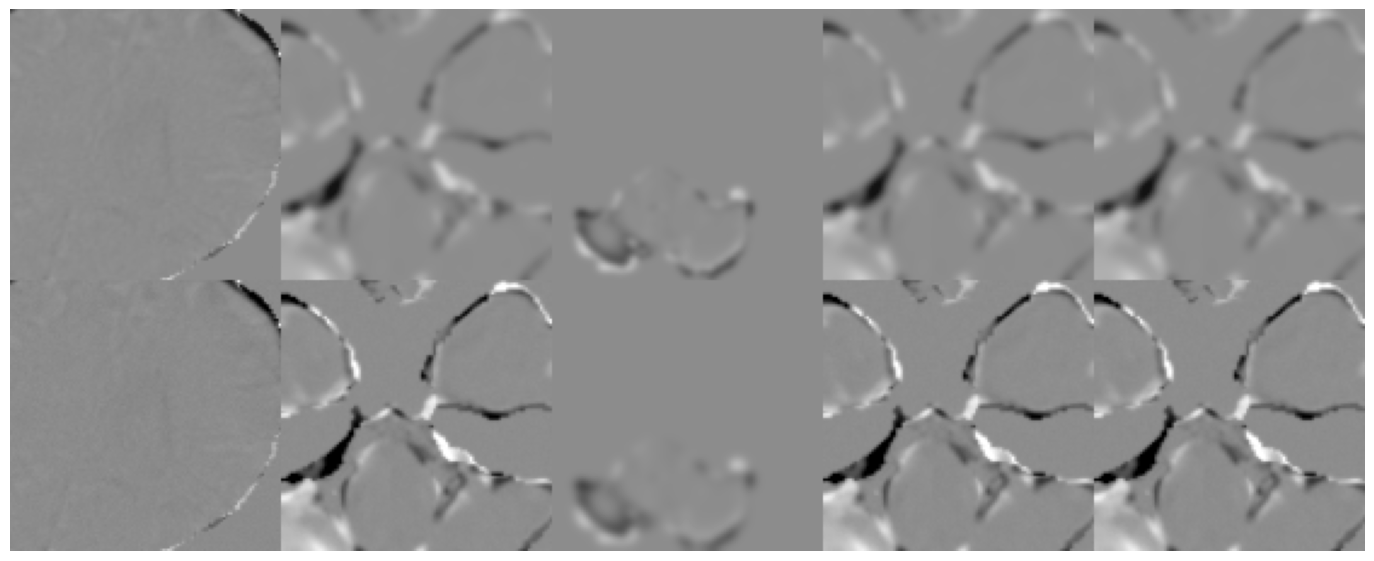

In [7]:
import numpy as np
import matplotlib.pyplot as plt
images = next(iter(train_data_loader))
fig, ax = plt.subplots(1, 1, figsize=(15,6))
rng = np.random.default_rng(420)
print([i.numpy().shape for i in images[0]])
images = np.asarray([i.numpy() for i in images[0]])
images = np.concatenate(images, 4)
idx = rng.choice(np.arange(images.shape[0]), 5)
z_idx = images.shape[2] // 2
images = (np.concatenate(images[idx, 1, z_idx, :, :], 0)).T
ax.imshow(images, cmap='gray')
plt.tight_layout()
plt.axis('off')
plt.show()